In [1]:
import pandas as pd
path_airbnb = "/Users/miriamg/Documents/Mid-Term-Project_ML_Ironhack/Mid-term project/Cleaning/clean_airbnb_df_berlin.csv"
be_airbnb = pd.read_csv(path_airbnb)
be_airbnb.columns

Index(['Unnamed: 0', 'Neighbourhood', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 365', 'Number of Reviews', 'Cancellation Policy'],
      dtype='object')

In [2]:
be_airbnb.drop(columns= ['Unnamed: 0', 'Property Type',
        'Bed Type', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights'
        , 'Cancellation Policy'], inplace= True)

In [5]:
#Adding column of days rented

be_airbnb['days_rented'] = [365 - a for a in be_airbnb['Availability 365']]
be_airbnb.columns

Index(['Neighbourhood', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Availability 365', 'Number of Reviews', 'days_rented',
       'revenue'],
      dtype='object')

In [54]:
#Adding column of revenue which is our target variable

be_airbnb['revenue'] = be_airbnb['days_rented']* be_airbnb['Price']
be_airbnb.to_csv('Tablaue_be_abnb.csv', index= False)
be_airbnb

,Neighbourhood,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Availability 365,Number of Reviews,days_rented,revenue
0,Lichtenberg,Entire home/apt,2,1.0,1.0,1.0,32.0,45,6,320,10240.0
1,Lichtenberg,Entire home/apt,2,1.0,1.0,1.0,40.0,212,9,153,6120.0
2,Lichtenberg,Private room,2,1.0,1.0,1.0,35.0,9,3,356,12460.0
3,Lichtenberg,Private room,1,1.0,1.0,1.0,15.0,30,4,335,5025.0
4,Lichtenberg,Private room,2,1.0,1.0,1.0,21.0,363,4,2,42.0
...,...,...,...,...,...,...,...,...,...,...,...
10538,Schöneberg,Private room,2,1.0,1.0,1.0,25.0,0,2,365,9125.0
10539,Reinickendorf,Private room,2,1.0,1.0,1.0,38.0,0,7,365,13870.0
10540,Reinickendorf,Private room,2,1.0,1.0,1.0,45.0,365,3,0,0.0
10541,Reinickendorf,Entire home/apt,2,1.0,1.0,1.0,35.0,11,3,354,12390.0


In [7]:
numerical_df = be_airbnb.select_dtypes(include ='number')
numerical_df

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Availability 365,Number of Reviews,days_rented,revenue
0,2,1.0,1.0,1.0,32.0,45,6,320,10240.0
1,2,1.0,1.0,1.0,40.0,212,9,153,6120.0
2,2,1.0,1.0,1.0,35.0,9,3,356,12460.0
3,1,1.0,1.0,1.0,15.0,30,4,335,5025.0
4,2,1.0,1.0,1.0,21.0,363,4,2,42.0
...,...,...,...,...,...,...,...,...,...
10538,2,1.0,1.0,1.0,25.0,0,2,365,9125.0
10539,2,1.0,1.0,1.0,38.0,0,7,365,13870.0
10540,2,1.0,1.0,1.0,45.0,365,3,0,0.0
10541,2,1.0,1.0,1.0,35.0,11,3,354,12390.0


In [8]:
categorical_df = be_airbnb.select_dtypes(include = 'object')
categorical_df.nunique()

#Neighbourhood nominal
#The rest ordinal

Neighbourhood    18
Room Type         3
dtype: int64

In [9]:
categorical_nominals_df = pd.get_dummies(categorical_df, dtype= int)

categorical_nominals_df

,Neighbourhood_Charlottenburg,Neighbourhood_Friedrichshain,Neighbourhood_Hellersdorf,Neighbourhood_Kreuzberg,Neighbourhood_Köpenick,Neighbourhood_Lichtenberg,Neighbourhood_Marzahn,Neighbourhood_Mitte,Neighbourhood_Neukölln,Neighbourhood_Pankow,...,Neighbourhood_Schöneberg,Neighbourhood_Spandau,Neighbourhood_Steglitz,Neighbourhood_Tempelhof,Neighbourhood_Treptow,Neighbourhood_Wilmersdorf,Neighbourhood_Zehlendorf,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10538,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
for column in categorical_df.columns:
    unique_values = be_airbnb[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Neighbourhood: ['Lichtenberg' 'Charlottenburg' 'Neukölln' 'Friedrichshain' 'Schöneberg'
 'Mitte' 'Spandau' 'Reinickendorf' 'Tempelhof' 'Kreuzberg' 'Wilmersdorf'
 'Pankow' 'Steglitz' 'Zehlendorf' 'Treptow' 'Köpenick' 'Marzahn'
 'Hellersdorf']
Unique values in Room Type: ['Entire home/apt' 'Private room' 'Shared room']


In [11]:
complete_df = pd.concat([categorical_nominals_df, numerical_df], axis =1)

complete_df

,Neighbourhood_Charlottenburg,Neighbourhood_Friedrichshain,Neighbourhood_Hellersdorf,Neighbourhood_Kreuzberg,Neighbourhood_Köpenick,Neighbourhood_Lichtenberg,Neighbourhood_Marzahn,Neighbourhood_Mitte,Neighbourhood_Neukölln,Neighbourhood_Pankow,...,Room Type_Shared room,Accommodates,Bathrooms,Bedrooms,Beds,Price,Availability 365,Number of Reviews,days_rented,revenue
0,0,0,0,0,0,1,0,0,0,0,...,0,2,1.0,1.0,1.0,32.0,45,6,320,10240.0
1,0,0,0,0,0,1,0,0,0,0,...,0,2,1.0,1.0,1.0,40.0,212,9,153,6120.0
2,0,0,0,0,0,1,0,0,0,0,...,0,2,1.0,1.0,1.0,35.0,9,3,356,12460.0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,1.0,1.0,1.0,15.0,30,4,335,5025.0
4,0,0,0,0,0,1,0,0,0,0,...,0,2,1.0,1.0,1.0,21.0,363,4,2,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10538,0,0,0,0,0,0,0,0,0,0,...,0,2,1.0,1.0,1.0,25.0,0,2,365,9125.0
10539,0,0,0,0,0,0,0,0,0,0,...,0,2,1.0,1.0,1.0,38.0,0,7,365,13870.0
10540,0,0,0,0,0,0,0,0,0,0,...,0,2,1.0,1.0,1.0,45.0,365,3,0,0.0
10541,0,0,0,0,0,0,0,0,0,0,...,0,2,1.0,1.0,1.0,35.0,11,3,354,12390.0


## X-y split

In [12]:
complete_df = pd.concat([categorical_nominals_df, numerical_df],axis=1)

complete_df

,Neighbourhood_Charlottenburg,Neighbourhood_Friedrichshain,Neighbourhood_Hellersdorf,Neighbourhood_Kreuzberg,Neighbourhood_Köpenick,Neighbourhood_Lichtenberg,Neighbourhood_Marzahn,Neighbourhood_Mitte,Neighbourhood_Neukölln,Neighbourhood_Pankow,...,Room Type_Shared room,Accommodates,Bathrooms,Bedrooms,Beds,Price,Availability 365,Number of Reviews,days_rented,revenue
0,0,0,0,0,0,1,0,0,0,0,...,0,2,1.0,1.0,1.0,32.0,45,6,320,10240.0
1,0,0,0,0,0,1,0,0,0,0,...,0,2,1.0,1.0,1.0,40.0,212,9,153,6120.0
2,0,0,0,0,0,1,0,0,0,0,...,0,2,1.0,1.0,1.0,35.0,9,3,356,12460.0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,1.0,1.0,1.0,15.0,30,4,335,5025.0
4,0,0,0,0,0,1,0,0,0,0,...,0,2,1.0,1.0,1.0,21.0,363,4,2,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10538,0,0,0,0,0,0,0,0,0,0,...,0,2,1.0,1.0,1.0,25.0,0,2,365,9125.0
10539,0,0,0,0,0,0,0,0,0,0,...,0,2,1.0,1.0,1.0,38.0,0,7,365,13870.0
10540,0,0,0,0,0,0,0,0,0,0,...,0,2,1.0,1.0,1.0,45.0,365,3,0,0.0
10541,0,0,0,0,0,0,0,0,0,0,...,0,2,1.0,1.0,1.0,35.0,11,3,354,12390.0


In [13]:
X = complete_df.drop(columns=['revenue'])
y = complete_df[['revenue']]


In [14]:
y

,revenue
0,10240.0
1,6120.0
2,12460.0
3,5025.0
4,42.0
...,...
10538,9125.0
10539,13870.0
10540,0.0
10541,12390.0


## Train-test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, random_state=42)

In [17]:
X_train

,Neighbourhood_Charlottenburg,Neighbourhood_Friedrichshain,Neighbourhood_Hellersdorf,Neighbourhood_Kreuzberg,Neighbourhood_Köpenick,Neighbourhood_Lichtenberg,Neighbourhood_Marzahn,Neighbourhood_Mitte,Neighbourhood_Neukölln,Neighbourhood_Pankow,...,Room Type_Private room,Room Type_Shared room,Accommodates,Bathrooms,Bedrooms,Beds,Price,Availability 365,Number of Reviews,days_rented
5011,0,0,0,0,0,0,0,0,1,0,...,0,0,2,1.0,1.0,1.0,39.0,288,15,77
10537,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1.0,1.0,1.0,37.0,0,3,365
5035,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1.0,1.0,1.0,20.0,0,1,365
6972,0,0,0,1,0,0,0,0,0,0,...,0,0,4,1.0,2.0,2.0,130.0,67,3,298
111,0,0,0,0,0,0,0,0,0,0,...,0,0,5,1.0,3.0,3.0,70.0,2,8,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,1,0,0,0,0,0,0,0,0,...,0,0,2,1.5,1.0,1.0,70.0,0,5,365
5191,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1.0,1.0,1.0,18.0,0,0,365
5390,0,0,0,0,0,0,0,0,1,0,...,1,0,2,1.0,1.0,1.0,30.0,0,6,365
860,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1.0,1.0,1.0,20.0,0,0,365


## Standardize the data. PowerTransformer

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [19]:
scaler = PowerTransformer()

In [20]:
scaler_fitted = scaler.fit(X_train)
X_train= scaler_fitted.transform(X_train)
X_train

array([[-0.24478474, -0.42920213, -0.03375691, ...,  1.19232091,
         0.85426741, -1.51190991],
       [-0.24478474, -0.42920213, -0.03375691, ..., -1.14216021,
        -0.14088168,  0.81652973],
       [-0.24478474, -0.42920213, -0.03375691, ..., -1.14216021,
        -0.74421972,  0.81652973],
       ...,
       [-0.24478474, -0.42920213, -0.03375691, ..., -1.14216021,
         0.29217103,  0.81652973],
       [-0.24478474, -0.42920213, -0.03375691, ..., -1.14216021,
        -1.4312448 ,  0.81652973],
       [-0.24478474, -0.42920213, -0.03375691, ..., -1.14216021,
        -0.14088168,  0.81652973]])

In [21]:
X_test = scaler_fitted.transform(X_test)
X_test

array([[ 4.08522191, -0.42920213, -0.03375691, ...,  0.6256341 ,
        -0.38181449,  0.13126138],
       [-0.24478474, -0.42920213, -0.03375691, ...,  1.07544801,
        -0.38181449, -1.0301861 ],
       [-0.24478474, -0.42920213, -0.03375691, ..., -1.14216021,
        -0.38181449,  0.81652973],
       ...,
       [-0.24478474, -0.42920213, -0.03375691, ..., -1.14216021,
        -1.4312448 ,  0.81652973],
       [-0.24478474, -0.42920213, -0.03375691, ..., -0.04503514,
        -0.38181449,  0.68244621],
       [-0.24478474,  2.32990457, -0.03375691, ...,  1.27127986,
        -0.74421972, -1.85699208]])

In [22]:
scaler_fitted_y= scaler.fit(y_train)
y_train= scaler_fitted_y.transform(y_train)
y_train

array([[-1.12510397],
       [ 0.18575514],
       [-0.44535749],
       ...,
       [-0.04675523],
       [-0.44535749],
       [-0.23387492]])

In [23]:
y_test = scaler_fitted_y.transform(y_test)
y_test

array([[-0.29073249],
       [-0.00585658],
       [ 0.55497558],
       ...,
       [ 0.27719807],
       [ 0.3135694 ],
       [-1.7655739 ]])

## Applying linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [26]:
model.coef_

array([[3.94062965e+10, 6.18423079e+10, 5.75336947e+09, 6.63982754e+10,
        1.11648278e+10, 2.34290749e+10, 7.66775906e+09, 6.11995972e+10,
        7.10222137e+10, 2.59281720e+10, 1.55238751e+10, 4.85319782e+10,
        6.06419997e+09, 1.63190795e+10, 2.45341582e+10, 1.73898531e+10,
        2.90947279e+10, 1.49290274e+10, 1.86998877e+11, 1.86892956e+11,
        4.17945775e+10, 9.66739655e-03, 2.19764709e-02, 4.07104492e-02,
        2.30808258e-02, 5.79540253e-01, 2.95776367e-01, 1.07021332e-02,
        1.05957794e+00]])

In [27]:
model.intercept_

array([-2.20550248e-05])

## Predict the revenue

In [28]:
#I want to understand why if I don't convert to dataframes the model goes crazy
#Not sure I'm really using the transformed dataframe

X_train= pd.DataFrame(X_train)
X_test= pd.DataFrame(X_test)
y_test= pd.DataFrame(y_test)
y_train= pd.DataFrame(y_train)

#X_train #when transforming I lose the names of the columns, why?

In [29]:
random_host = X_test.sample()

In [30]:
random_host

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
1810,4.085222,-0.429202,-0.033757,-0.478078,-0.065716,-0.140001,-0.045029,-0.422779,-0.535674,-0.155637,...,1.035668,-0.113177,-0.312471,-0.234035,-0.168534,-0.746006,-1.39228,-1.14216,-0.140882,0.81653


In [31]:
model.predict(random_host)

array([[-0.37854142]])

In [32]:
#Inverse transform
scaler.inverse_transform(model.predict(random_host))

array([[7850.00229117]])

## Create predictions for the test set

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred= pd.DataFrame(y_pred)

In [35]:
y_test = pd.DataFrame(y_test)

In [36]:
y_test = y_test.reset_index(drop = True)

In [37]:
residuals_df = pd.concat([y_test, y_pred], axis=1)
residuals_df.columns = ["y_test", "y_pred"]
residuals_df

,y_test,y_pred
0,-0.290732,-0.244540
1,-0.005857,-0.400786
2,0.554976,0.562933
3,-0.242032,-0.061627
4,-1.158193,-1.412357
...,...,...
2631,0.738681,0.842433
2632,-0.302576,-0.267753
2633,0.277198,0.281658
2634,0.313569,0.468817


In [38]:
residuals_df["residual"] = residuals_df["y_test"]- residuals_df["y_pred"]

In [39]:
residuals_df.head()

,y_test,y_pred,residual
0,-0.290732,-0.244540,-0.046192
1,-0.005857,-0.400786,0.394930
2,0.554976,0.562933,-0.007958
3,-0.242032,-0.061627,-0.180405
4,-1.158193,-1.412357,0.254164


## Calculating metrics

In [40]:
mean_error = residuals_df["residual"].mean()
mean_error

-0.0007884507309408414

In [41]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [42]:
mse(y_test, y_pred)

0.09284591523452132

In [43]:
mae(y_test, y_pred)

0.19285216488652537

In [44]:
rmse= mse( y_test, y_pred, squared = False)
rmse

0.30470627698575775

## Computing R2_score for test_set

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test, y_pred)

0.9077791192051221

## Computing R2_score for train_set

In [47]:
y_pred_train = pd.DataFrame(model.predict(X_train))

In [59]:
r2= round(r2_score(y_train, y_pred_train),5)
r2

0.89696

In [57]:
# Calculating adjusted R^2
n = X_train.shape[0]  # Number of observations in the training set
p = X_train.shape[1]  # Number of features used for training
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R2: {adjusted_r2} \n')

Adjusted R2: 0.8996318395328171 



## Feature importance plot

In [50]:
feature_names = list(X.columns) #Why the names of the columns are transformed into numbers?
feature_names

['Neighbourhood_Charlottenburg',
 'Neighbourhood_Friedrichshain',
 'Neighbourhood_Hellersdorf',
 'Neighbourhood_Kreuzberg',
 'Neighbourhood_Köpenick',
 'Neighbourhood_Lichtenberg',
 'Neighbourhood_Marzahn',
 'Neighbourhood_Mitte',
 'Neighbourhood_Neukölln',
 'Neighbourhood_Pankow',
 'Neighbourhood_Reinickendorf',
 'Neighbourhood_Schöneberg',
 'Neighbourhood_Spandau',
 'Neighbourhood_Steglitz',
 'Neighbourhood_Tempelhof',
 'Neighbourhood_Treptow',
 'Neighbourhood_Wilmersdorf',
 'Neighbourhood_Zehlendorf',
 'Room Type_Entire home/apt',
 'Room Type_Private room',
 'Room Type_Shared room',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Price',
 'Availability 365',
 'Number of Reviews',
 'days_rented']

In [51]:
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]

fi = {"name": feature_names, "coeff": coefficients}
fi_df = pd.DataFrame(fi)

fi_df

,name,coeff
0,Neighbourhood_Charlottenburg,3.940630e+10
1,Neighbourhood_Friedrichshain,6.184231e+10
2,Neighbourhood_Hellersdorf,5.753369e+09
3,Neighbourhood_Kreuzberg,6.639828e+10
4,Neighbourhood_Köpenick,1.116483e+10
5,Neighbourhood_Lichtenberg,2.342907e+10
6,Neighbourhood_Marzahn,7.667759e+09
7,Neighbourhood_Mitte,6.119960e+10
8,Neighbourhood_Neukölln,7.102221e+10
9,Neighbourhood_Pankow,2.592817e+10


<ipython-input-52-4f2fad7cfe5a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y= fi_df['name'], x = fi_df['coeff'], palette='viridis')


<Axes: xlabel='coeff', ylabel='name'>

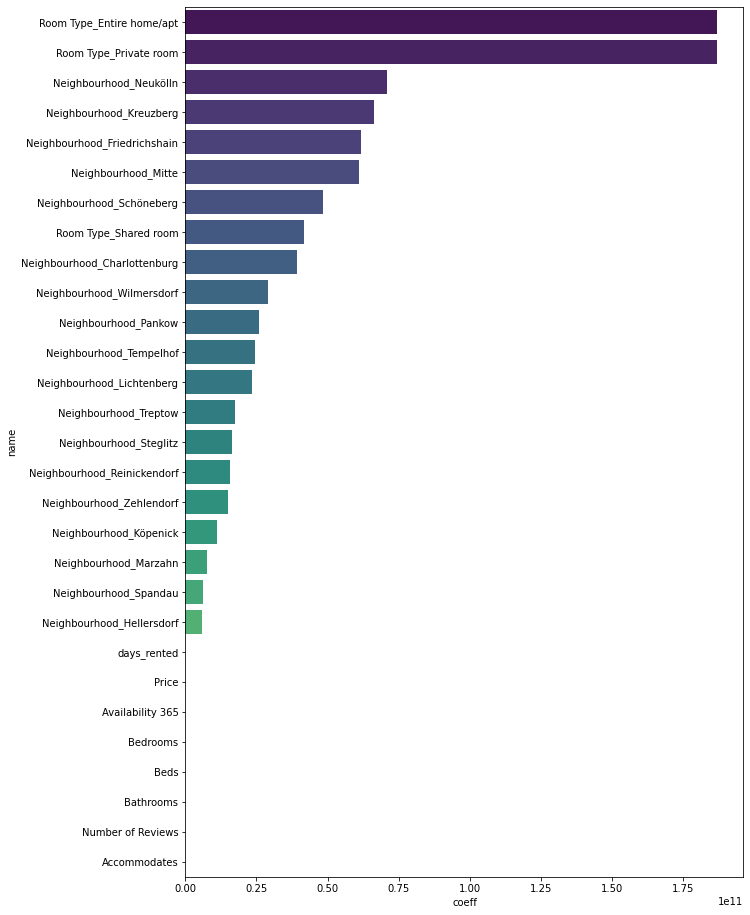

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

fi_df = fi_df.sort_values(by='coeff', ascending=False)
plt.figure(figsize=(10,16))

sns.barplot(y= fi_df['name'], x = fi_df['coeff'], palette='viridis')